<a href="https://colab.research.google.com/github/marhenk/marhenk/blob/main/Starter_Notebook_Exploring_AmericanStories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

Welcome to American Stories! Please run the next two cells (hint: hold Shift and press Enter three times) to install the required packages, and then we move to working with the American Stories dataset.

In [ ]:
###Installs
!pip install datasets
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [ ]:
#Imports
import json

from datasets import load_dataset
import tqdm as tq

# Introduction

Welcome to the intro notebook to AmericanStories. This is an expanded version of the intro notebook available here: https://colab.research.google.com/drive/1ifzTDNDtfrrTy-i7uaq3CALwIWa7GB9A?ts=648b98bf.

In this notebook, we will do three things:

1. Discuss ways to import the data
2. Explore the way the data is structured, and show simple code snippets for accessing the data
3. Provide three applications that would not be possible with keyword search based methods:

A. We show how to find out whether an *article* mentions two terms simultaneously

B. We show how to find out what other articles on a page with a keyword hit
discuss

C. We showcase a wire-cluster pipeline. Wire-clusters are same/similar articles
that originate in a article that went out over the newswire. With this you
can measure which places were exposed to the same newpaper content


# Part I: importing data

There are four main ways of accessing the American Stories data. A key contribution of our project is to make *articles* available, which requires linking together disjoint content regions. To take full advantange of this, we provide access to the data at the article level, or at the level of a scan, that is, one page of one edition of a single newspaper. For both ways, you can either query by year, or get a dump of all data. In sum, the four ways of interacting with our data:

a. Article level, for selected years

b. Article level, for all years

c. Scan level, for selected years

d. Scan level, for all years

### 1a: Article, level, for selected years

We will now select all articles for the year 1900. Below we will explore the resulting dataset in detail

In [ ]:
# let's start with deciding which years we want data for
article_level_desired_years = ["1900", ]

# now let's load our data, we have to specify the huggingface location of our
# data, the fact that we want to have a subset of years, and our desired years
dataset_article_level=load_dataset("dell-research-harvard/AmericanStories",
                                   "subset_years",
                                   year_list=article_level_desired_years,
                                   trust_remote_code=True
                                   )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

AmericanStories.py:   0%|          | 0.00/8.91k [00:00<?, ?B/s]

Only taking a subset of years. Change name to 'all_years' to use all years in the dataset.
{'1900': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1900.tar.gz'}


faro_1900.tar.gz:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Generating 1900 split: 0 examples [00:00, ? examples/s]

Loading associated


### 1b: article level, for all years
The next cell contains to get all articles for all years. It is commented because running it requires a lot of bandwidth and data. Please uncomment, and then run to get all data

In [ ]:
# Uncomment the next line and execute this cell to download the entire dataset
#dataset_article_level_all_years = load_dataset("dell-research-harvard/AmericanStories", "all_years")

### 1c: scan level, for selected years
The next cell contains to get all scans for selected years.

In [ ]:
# let's start with deciding which years we want data for
scan_level_desired_years = ["1900",]

# now let's load our data, we have to specify the huggingface location of our
# data, the fact that we want to have a subset of years, and our desired years
dataset_scan_level=load_dataset("dell-research-harvard/AmericanStories",
                                "subset_years_content_regions",
                                year_list=scan_level_desired_years
                                )

{'1900': 'https://huggingface.co/datasets/dell-research-harvard/AmericanStories/resolve/main/faro_1900.tar.gz'}


Generating 1900 split: 0 examples [00:00, ? examples/s]

### 1d: scan level, for all years
The next cell contains to get all scans for all years. It is commented because running it requires a lot of bandwidth and data. Please uncomment, and then run to get all data

In [ ]:
# Uncomment the next line and execute this cell to download the entire dataset
#dataset_scan_level_all_years = load_dataset("dell-research-harvard/AmericanStories", "all_years")

# Part II: Exploring the data, with applications

We will do three things in the next section:

1. Discuss the structure of the returned dataset
2. Discuss how to access the data
3. Implement our applications

### IIa: Article level

In [ ]:
# let's inspect the structure
print(dataset_article_level)

DatasetDict({
    1900: Dataset({
        features: ['article_id', 'newspaper_name', 'edition', 'date', 'page', 'headline', 'byline', 'article'],
        num_rows: 1118970
    })
})


In [ ]:
# We see that we have 1.1mln articles for 1900, and that we have several self-explanatory features for each article. Let's explore the data

In [ ]:
# the structure of the output is a dictionary. The keys of the dictionary are the fields we have for each article
dataset_article_level["1900"].features

{'article_id': Value(dtype='string', id=None),
 'newspaper_name': Value(dtype='string', id=None),
 'edition': Value(dtype='string', id=None),
 'date': Value(dtype='string', id=None),
 'page': Value(dtype='string', id=None),
 'headline': Value(dtype='string', id=None),
 'byline': Value(dtype='string', id=None),
 'article': Value(dtype='string', id=None)}

In [ ]:
# let's inspect a random article from 1900
dataset_article_level["1900"][5]

{'article_id': '7_1900-03-23_p6_sn83045462_00280655326_1900032301_0034',
 'newspaper_name': 'Evening star.',
 'edition': '01',
 'date': '1900-03-23',
 'page': 'p6',
 'headline': 'Young Folks\nSpring Shoes.',
 'byline': '',
 'article': "Our stock of Shoes for young peo-\npie comprises the best and most rep\nutable goods manufactured. All the\nlatest and most improved shapes are\nrepresented, and both service and\nappearance were considered i'll their\nselection. We are also showing the\nLow Shoes for misses and children,\nin welt and turn sole, patent leather.\nvici kid and Russia calf; and the Nici\nKid Spring Heel Shoes with patent\ntips, in extra sizes (21a to 51a). At\ntention is also called to our lines Of\nInfants Cacks and Soft Sole Shoes,\nin black, tans and other colors.\n\n\nThe spring styles are ready.\n\n\nYouths Shoes sizes II to . Pair. 81 so to 50. 80\nBoys Shoes; sizes 21a 5h. Pair S15O to IS 90\nMisses Shoes; sizes II to p Pair .s15O to $500\nChiliren's Shoes; sizes sls

In [ ]:
# we can see the headline, and that this appeared in the Evening star. Below we will learn more about the Evening star. For now, let's inspect the article
print(dataset_article_level["1900"][5]["article"])

Our stock of Shoes for young peo-
pie comprises the best and most rep
utable goods manufactured. All the
latest and most improved shapes are
represented, and both service and
appearance were considered i'll their
selection. We are also showing the
Low Shoes for misses and children,
in welt and turn sole, patent leather.
vici kid and Russia calf; and the Nici
Kid Spring Heel Shoes with patent
tips, in extra sizes (21a to 51a). At
tention is also called to our lines Of
Infants Cacks and Soft Sole Shoes,
in black, tans and other colors.


The spring styles are ready.


Youths Shoes sizes II to . Pair. 81 so to 50. 80
Boys Shoes; sizes 21a 5h. Pair S15O to IS 90
Misses Shoes; sizes II to p Pair .s15O to $500
Chiliren's Shoes; sizes sls to 1Ol9 Pair


S1.25 to s.. 90
Infants Shoes: sizes 6 to s. Pair 81 90 to 81 II
Infants Cacks; sizes 2 TO g. Pair soc. to 81 %
Misses OYford5: sizes II to .. Pair. 81 50
Misses Springfield Oxfords extra sizes, 2H to
oi2. Falr -SZ.oo
Chiiren's O1fords; sizes 

In [ ]:
# it is easy to loop through articles and see if it mentions 'spring style'
# here we will loop through the first ten articles

# let's initialize a dict for our articles. Let's collect the index of the
# article that contains our desired string as well as the article_id in case
# we want to find articles back later
dict_of_articles_containing_spring_style = {}

# we are interesting in spring style
str_of_interest = "spring style"

# let's loop!
for article_n in range(10):

  # let's grab the article data
  article = dataset_article_level["1900"][article_n]

  # let's grab the article text
  article_text = article["article"]

  # check if we see the text
  if str_of_interest in article_text:
    dict_of_articles_containing_spring_style[article_n] = article["article_id"]
  else:
    pass

# let's see which articles feature this text
print(dict_of_articles_containing_spring_style)

{5: '7_1900-03-23_p6_sn83045462_00280655326_1900032301_0034'}


## Application: Two strings within the *same article*

Previous methods for querying historical newspapers often relied on keyword
searches.

This made it impossible to verify if the same *article* mentioned
two terms.

Our dataset allows this, let's work through a simple example

In [ ]:
# let's see if we can see if an article mentions both spring style
# and infants shoes
str_of_interest_1 = "spring style"
str_of_interest_2 = "infants shoes"

# we want to find articles back later
dict_of_articles_containing_spring_style_infants_shoes = {}

# proceed like before, restricting ourselves to the first 10 articles
for article_n in range(10):

  # let's grab the article data
  article = dataset_article_level["1900"][article_n]

  # let's grab the article text. We need to worry about capitalization here
  article_text = article["article"].lower()

  # we now test for both strings being present
  if (
      str_of_interest_1 in article_text
      and
      str_of_interest_2 in article_text
  ):
    dict_of_articles_containing_spring_style_infants_shoes[article_n] = (
        article["article_id"]
    )
  else:
    pass

# let's see which articles feature this text
print(dict_of_articles_containing_spring_style_infants_shoes)

{5: '7_1900-03-23_p6_sn83045462_00280655326_1900032301_0034'}


In [ ]:

dataset_article_level


DatasetDict({
    1900: Dataset({
        features: ['article_id', 'newspaper_name', 'edition', 'date', 'page', 'headline', 'byline', 'article'],
        num_rows: 1118970
    })
})

In [ ]:
# in our article we found that the Boer War was the biggest story. We can
# see which articles mention both the Boer War, and Winston Churchill who
# was there as a report. Let's try with all articles this time
str_of_interest_1 = "boer"
str_of_interest_2 = "churchill"

# we want to find articles back later
dict_of_articles_containing_boer_war_churchill = {}

# proceed like before, looping through all articles. This should take 3 to 4 min
for article_n in tq.tqdm(range(1118970)):

  # let's grab the article data
  article = dataset_article_level["1900"][article_n]

  # let's grab the article text. We need to worry about capitalization here
  article_text = article["article"].lower()

  # we now test for both strings being present
  if (
      str_of_interest_1 in article_text
      and
      str_of_interest_2 in article_text
  ):
    dict_of_articles_containing_boer_war_churchill[article_n] = (
        article["article_id"]
    )
  else:
    pass


100%|██████████| 1118970/1118970 [02:24<00:00, 7758.78it/s]


In [ ]:
# let's see how many articles we got
print(len(dict_of_articles_containing_boer_war_churchill))

# let's print the results
print(dict_of_articles_containing_boer_war_churchill)

122
{676: '12_1900-12-15_p25_sn83045462_00280655375_1900121501_0335', 700: '56_1900-12-15_p25_sn83045462_00280655375_1900121501_0335', 5538: '3_1900-05-12_p1_sn86072192_00340583395_1900051201_0370', 8451: '29_1900-02-01_p3_sn88053087_00271741613_1900020101_0128', 9524: '10_1900-01-03_p1_sn86072192_00340583383_1900010301_0020', 14931: '21_1900-03-08_p1_sn90059523_00206533985_1900030801_0075', 39000: '5_1900-03-01_p1_sn86072192_00340583383_1900030101_0524', 43128: '32_1900-03-04_p23_sn83030214_00175040833_1900030401_0070', 43143: '24_1900-03-04_p23_sn83030214_00175040833_1900030401_0070', 43644: '10_1900-12-12_p7_sn83030214_0017504095A_1900121201_0227', 46674: '15_1900-05-04_p1_sn86072192_00340583395_1900050401_0306', 47314: '8_1900-04-25_p1_sn86072192_00340583395_1900042501_0226', 47325: '19_1900-04-25_p1_sn86072192_00340583395_1900042501_0226', 50899: '3_1900-02-10_p1_sn84020358_0041566820A_1900021001_0361', 51959: '57_1900-12-16_p12_sn86072192_00340583127_1900121601_0727', 51964: '66_

In [ ]:
# let's inspect the first one
dataset_article_level["1900"][5538]

# this article is from the Age Herald from May 12th, and describes the progress of the war

{'article_id': '3_1900-05-12_p1_sn86072192_00340583395_1900051201_0370',
 'newspaper_name': 'The age-herald.',
 'edition': '01',
 'date': '1900-05-12',
 'page': 'p1',
 'headline': 'Lord Roberts Continues His\n\n March to KroonStadt.\n\nIS HOW WITHIN TWENTY MILES\n\nHundreds of the British Troopers Sank Into Watery Grave While Att tempting to Cross the\n\n Vaal River',
 'byline': '',
 'article': 'London, May 12-i a. m.-A British cole Imn 300O strong has arrived at VrybGrg, 1DG miles from Mafeking. It reached there Thursday. and although harassed by the Boers, is pushing swiftly forward. Fifty miles south of Vryburg, at Taungs, is Gen eral Hunters main body moving slowly and tending with considerable forces. The pick of his mounted men are the 5000 who are going with wheeled transport and at q rate that possibly bring them to Mafeking on Monday or Tuesday next.\n\n Lord Roberts narrative closes with Thursday evening, but he continued his march toward kroonstadt, twenty miles distant, and

In [ ]:
# let's print the article
print(dataset_article_level["1900"][5538]["article"])

London, May 12-i a. m.-A British cole Imn 300O strong has arrived at VrybGrg, 1DG miles from Mafeking. It reached there Thursday. and although harassed by the Boers, is pushing swiftly forward. Fifty miles south of Vryburg, at Taungs, is Gen eral Hunters main body moving slowly and tending with considerable forces. The pick of his mounted men are the 5000 who are going with wheeled transport and at q rate that possibly bring them to Mafeking on Monday or Tuesday next.

 Lord Roberts narrative closes with Thursday evening, but he continued his march toward kroonstadt, twenty miles distant, and by this time he must know whether the Boers intend to fight there.

 Mir. Winston Churchill says there were only 20O0 Boers who opposed the British at Zard river. Another estimate is that 6oo0 naers with six guns made rear guard ac- tion. while many other thousands wlth conveys retired without firing shot

 President Steyn and council of the leaders of several thousand Free Staters in the Lady Bra

In [ ]:
import pandas as pd
# It is possible to visualze the frequency of appearance over time

# let's initialize a list of our dates
list_of_dates = []

# let's loop over our article indices
for article_n in dict_of_articles_containing_boer_war_churchill.keys():

  # let's grab the date
  date = dataset_article_level["1900"][article_n]['date']

  # let's add to our list
  list_of_dates.append(date)



<Axes: xlabel='date'>

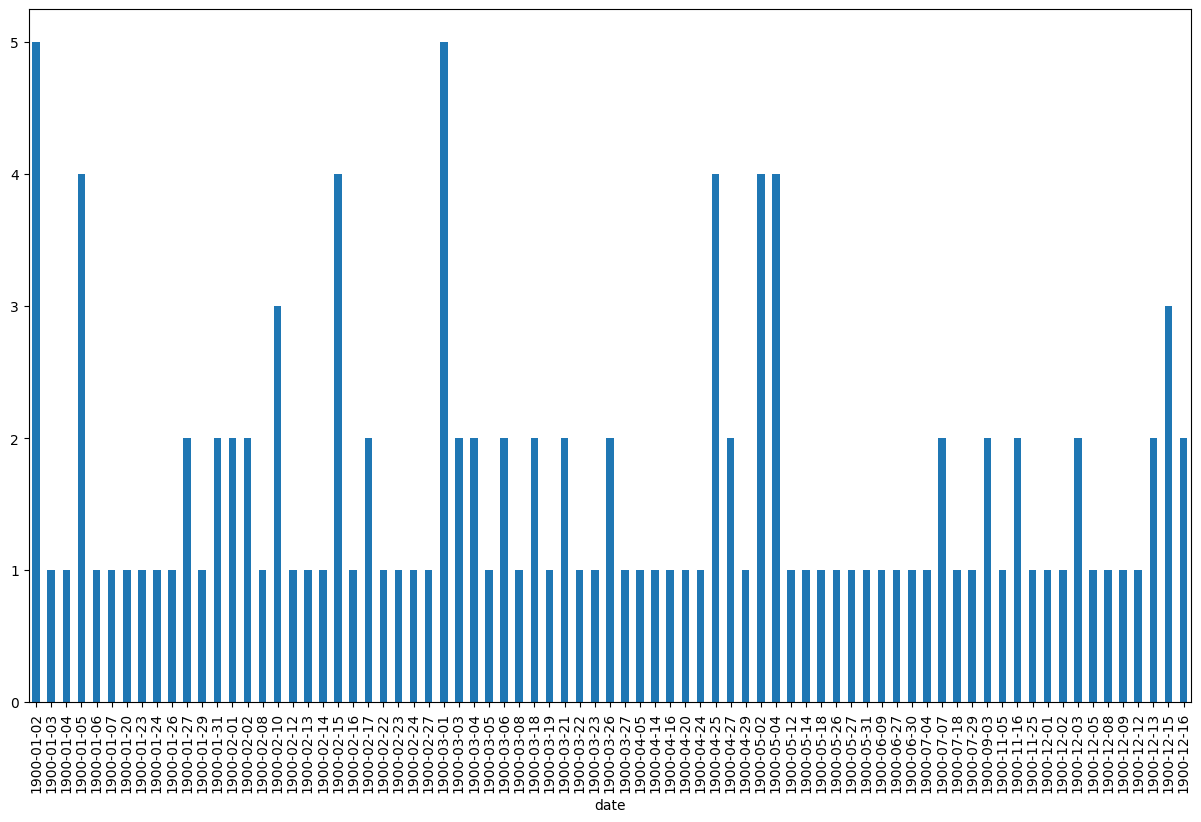

In [ ]:
#  now let's plot the frequency by date
df = pd.DataFrame({'date': list_of_dates})
df.groupby('date').size().plot(kind='bar', figsize=(15,9))

### IIb: Scan level

In [ ]:
# let's inspect the structure
print(dataset_scan_level)

DatasetDict({
    1900: Dataset({
        features: ['raw_data_string'],
        num_rows: 77496
    })
})


In [ ]:
# let's inspect the data for 1900. Note that this data is provided as a string.
# We can easily convert to a JSON

# get the string
raw_data_string = dataset_scan_level["1900"][0]['raw_data_string']

# convert to a dict
article_json = json.loads(raw_data_string)

# inspect which features we have
article_json.keys()

dict_keys(['page_number', 'scan_url', 'scan_ocr', 'scan', 'bboxes', 'edition', 'full articles'])

Each scan contains several pieces of information:

1. The page it appears on
2. The URL linking to the original page scan
3. Meta-information on the scan (scan and scan_ocr)
4. A dictionary of the bounding boxes that we identified on the page
5. The date of this edition
6. A dictionary of full_articles appearing on this page. Here it is
especially important to note that we include a list of the bounding
boxes that together form the article



In [ ]:
# Each scan contains several pieces of information, here we are just accessing the
# first article
article_json['full articles'][0]

{'object_ids': [47, 49, 30, 0],
 'headline': 'BOAT RACES\n\nROWING ASSOCIATION MEETS\n\n\nAND ACTS.\n\nAll Three Clubs Represented-Financ\nAre in Good Condition-Question OF\nTraining Quarters-Club Captains.',
 'article': "There are to be rowing races next\nSeptember\n\n\nThe Hawaiian Rowing Association\nheld a meeting last night at the resi-\ndence of A. G. NJ Robertson. All three\nclubs were represented. The Healanis\nwere represented by Walter Wall and\nF.. w. Klebahn; the Myrtles by A. G..\nNJ. Robertson, A. A. Wilder. and w.\nw. Harris, and the Leilanis by John\nLane.\n\n\nThe accounts of last year were audit\ned and approved, and show a balance on\nhand of 1858 So.\n\n\n1t was decided that there should be\na regatta held the second Saturday in\nSeptember on the Pearl Harbor course.\n{ two races, senior and Junior, four cared\nboats. There were no restrictions plac-\ned on the kind of boat to be used, and it\nis probable that the Australian boats\nused last year, will be again used

In [ ]:
# note that this dictionary lists the bounding boxes the article is composed
# of, the article text, and the article id. If we want, we can use this article
# id to link articles we found above to their pages. Note that all article text
# that you can explore using the article data, you can also explore using the
# scan data

### Let's now go back to the evenstar

We will try to find the page that the article we identified above appeared on

In [ ]:
# let's start with identifying the article id
article_id_of_interest = dict_of_articles_containing_spring_style_infants_shoes[5]
print(article_id_of_interest)

7_1900-03-23_p6_sn83045462_00280655326_1900032301_0034


In [ ]:
# we will take our article and loop through articles on page to find the
# relevant page

# we want to find articles back later. Let's record the index of the page and
# then the index of the article that we're looking for
page_with_hit = {}

# proceed like before, looping through all scans (we saw above how many there are).
# This should take 3
for scan_n in tq.tqdm(range(77496)):

  # get the string
  raw_data_string = dataset_scan_level["1900"][scan_n]['raw_data_string']

  # convert to a dict
  article_json = json.loads(raw_data_string)

  # now we have to loop through articles
  for article_n in range(len(article_json["full articles"])):

    # let's grab the article
    article_data = article_json['full articles'][article_n]

    # note that the ids have '.json' attached here
    article_id = article_data["id"].split(".")[0]

    # let's see if the id matches
    if article_id == article_id_of_interest:
      page_with_hit[scan_n] = article_n
    else:
      pass

100%|██████████| 77496/77496 [01:01<00:00, 1269.79it/s]


In [ ]:
page_with_hit

{1: 5}

## Application: What other articles are printed with our article

Now that we have identified the page we can ask what other articles were
printed on the page that our article of interest appears on!

In [ ]:
# let's get the page our articles appears on
raw_data_string = dataset_scan_level["1900"][1]['raw_data_string']

# convert to a dict
article_json = json.loads(raw_data_string)

In [ ]:
# let's inspect that we have recovered our article
article_json['full articles'][5]

{'object_ids': [41, 6],
 'headline': 'Young Folks\nSpring Shoes.',
 'article': "Our stock of Shoes for young peo-\npie comprises the best and most rep\nutable goods manufactured. All the\nlatest and most improved shapes are\nrepresented, and both service and\nappearance were considered i'll their\nselection. We are also showing the\nLow Shoes for misses and children,\nin welt and turn sole, patent leather.\nvici kid and Russia calf; and the Nici\nKid Spring Heel Shoes with patent\ntips, in extra sizes (21a to 51a). At\ntention is also called to our lines Of\nInfants Cacks and Soft Sole Shoes,\nin black, tans and other colors.\n\n\nThe spring styles are ready.\n\n\nYouths Shoes sizes II to . Pair. 81 so to 50. 80\nBoys Shoes; sizes 21a 5h. Pair S15O to IS 90\nMisses Shoes; sizes II to p Pair .s15O to $500\nChiliren's Shoes; sizes sls to 1Ol9 Pair\n\n\nS1.25 to s.. 90\nInfants Shoes: sizes 6 to s. Pair 81 90 to 81 II\nInfants Cacks; sizes 2 TO g. Pair soc. to 81 %\nMisses OYford5: sizes 

In [ ]:
# now we can inspect what else appeared on that page that day!
article_json['full articles']

[{'object_ids': [57, 0],
  'headline': '',
  'article': "The District committees should start i'm\nmediately to secure action on certain pend\ning street railway extension bills which\nrepresent the urgent needs of thousands of\nwashingtonians. These bills, specifically,\npropose a westward extension of the Cap\nital Traction line from the State. War and\nNavy building. to furnish transit facilities\nto the people living in that section south of\nPENNSYLVANIA avenue; an eastward extern\nsion of the same line from Sth street and\nPennsylvania avenue southeast to the\nEastern Branch, to cover wide area now\ndevoid of transportation advantages; and\na northeastward extension of the Metro\npolitan line from Columbia road and 18th\nstreet to Park street, to supply the needs\nof a large and rapidly growing suburban\ncommunity living west of 14th street.\n\n\nIrrespective of the wishes or plans of the\nrailroad companies, these improvements are\ndemanded by the people in accordance with\nthe 

In [ ]:
# finally, we can inspect the image of the original page!
article_json['scan']

# The jp2 URL is the URL to the image, let's visualize it, this will take a bit of code

{'lccn': 'sn83045462',
 'edition': 'ed-01',
 'date': '1900-03-23',
 'page': '6',
 'jp2_url': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1900-03-23/ed-1/seq-6.jp2',
 'ocr_text_url': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1900-03-23/ed-1/seq-6/ocr.txt',
 'ocr_xml_url': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1900-03-23/ed-1/seq-6/ocr.xml',
 'raw_data_loc': 'https://chroniclingamerica.loc.gov/data/batches/dlc_japanesechin_ver01/data/sn83045462/00280655326/1900032301/0034.jp2',
 'height': 6363,
 'width': 4850}

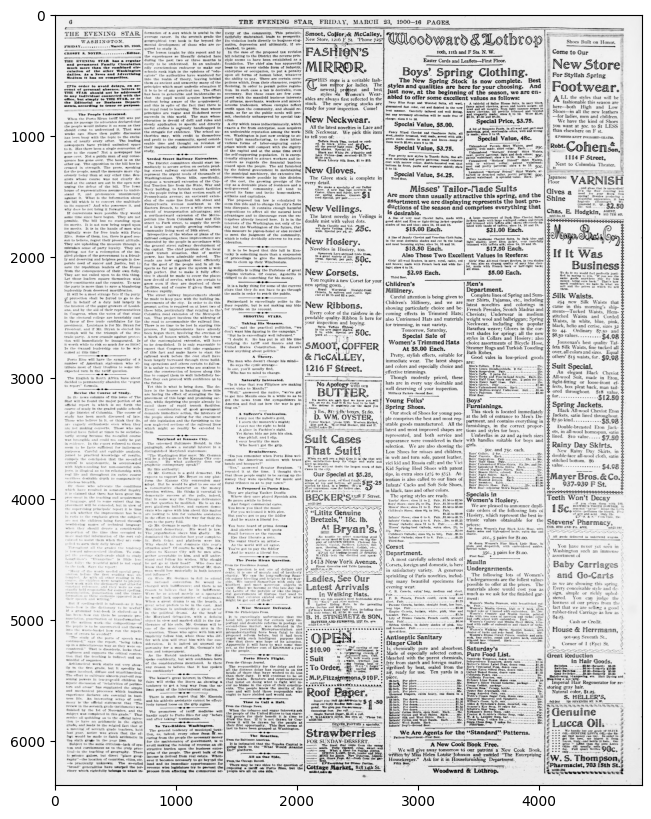

In [ ]:
import requests
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_ca_scan_img(ca_url):
  img_download_session = requests.Session()
  response = img_download_session.get(ca_url)
  if response.status_code != 200:
    print(f'Error! {response.status_code}')
    print(f'Please verify that {ca_url} is a valid chronicling america url!')
    response.raise_for_status()

  data = response.content
  ca_img = cv2.imdecode(np.frombuffer(data, np.uint8), cv2.IMREAD_COLOR)
  return ca_img

# grab the url
ca_url = article_json['scan']['jp2_url']

#Get the image scan
ca_img = get_ca_scan_img(ca_url)

# Create a figure for the plot
plt.ion()
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 10)

# Display image
ax.imshow(ca_img)
fig.suptitle('')

plt.show()

In [ ]:
# with a bit more work, this routine can of course be expanded to the edition,
# that is, all pages in that newspaper on the same day

# Application: Spelling checking

There is natural variation in the quality of the scans, and of OCR. It is
straightforward to apply a spelling checker to any article. Here we briefly
demonstrate how


In [ ]:
# let's return to our article about shoes
shoes_article = dataset_article_level["1900"][5]['article']

In [ ]:
# let's have a look
print(shoes_article)

Our stock of Shoes for young peo-
pie comprises the best and most rep
utable goods manufactured. All the
latest and most improved shapes are
represented, and both service and
appearance were considered i'll their
selection. We are also showing the
Low Shoes for misses and children,
in welt and turn sole, patent leather.
vici kid and Russia calf; and the Nici
Kid Spring Heel Shoes with patent
tips, in extra sizes (21a to 51a). At
tention is also called to our lines Of
Infants Cacks and Soft Sole Shoes,
in black, tans and other colors.


The spring styles are ready.


Youths Shoes sizes II to . Pair. 81 so to 50. 80
Boys Shoes; sizes 21a 5h. Pair S15O to IS 90
Misses Shoes; sizes II to p Pair .s15O to $500
Chiliren's Shoes; sizes sls to 1Ol9 Pair


S1.25 to s.. 90
Infants Shoes: sizes 6 to s. Pair 81 90 to 81 II
Infants Cacks; sizes 2 TO g. Pair soc. to 81 %
Misses OYford5: sizes II to .. Pair. 81 50
Misses Springfield Oxfords extra sizes, 2H to
oi2. Falr -SZ.oo
Chiiren's O1fords; sizes 

The article text contains a few mistakes that we can correct. Looking at the text of the article, a few errors are apparent:
1. Some spelling mistakes exist, for example "peopie" in the first/second line
2. Some words are divided between multiple lines ("peo- pie", "rep utable", "At tention", etc).
3. Capitalization errors are somewhat common: "i'll", "...lines Of..."

In [ ]:
# we have to download a spellchecking package
!pip install symspellpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 9.2 MB/s eta 0:00:00


In [ ]:
# let's initialize the package
import pkg_resources
from symspellpy import SymSpell, Verbosity
import string

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
en_dict = pkg_resources.resource_filename('symspellpy', 'frequency_dictionary_en_82_765.txt')
sym_spell.load_dictionary(en_dict, term_index=0, count_index=1)

<ipython-input-35-db733037114f>:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
# we now create a few functions that take care of the issues flagged above

# thsese two functions implement spelling corrections
def check_word(word):
  no_punc_word = word.strip(string.punctuation)
  if len(no_punc_word) > 0:
    suggestions = sym_spell.lookup(no_punc_word, Verbosity.CLOSEST, max_edit_distance=1, include_unknown=True, transfer_casing=True)
  else:
    return word
  return word.replace(no_punc_word, suggestions[0].term)

def spell_check(text):
  lines = text.split('\n')
  checked_lines = []
  for line in lines:
    words = line.split(' ')
    checked_line = ' '.join([check_word(word) for word in words])
    checked_lines.append(checked_line)
  return '\n'.join(checked_lines)

# this function checks capitalization
def capitalization_check(text):
  lines = text.split('\n')
  checked_lines = []
  for line in lines:
    words = line.split(' ')
    for i in range(1, len(words)):
      if words[i-1][-1] in ['.', '!', '?']:
        words[i] = words[i].capitalize()
      else:
        no_punc_word = words[i].strip(string.punctuation)
        if no_punc_word in sym_spell.words and no_punc_word not in ['i', "i'll"]: # Check that the word is not a propper noun
          words[i] = words[i].replace(no_punc_word, no_punc_word.lower())

    checked_lines.append(' '.join(words))
  return '\n'.join(checked_lines)

# this functions corrects line breaks
def line_merge(text):
  lines = [l.split() for l in text.split('\n')]
  for i in range(len(lines) - 1):
    if len(lines[i]) == 0 or len(lines[i+1]) == 0:
      continue
    elif lines[i][-1][-1] == '-': # Automatically merge if a line ends with a hyphen
      lines[i][-1] = lines[i][-1][:-1] + lines[i+1][0]
      lines[i+1] = lines[i+1][1:]
    elif lines[i][-1].strip(string.punctuation).lower() not in sym_spell.words or lines[i+1][0].strip(string.punctuation).lower() not in sym_spell.words:
      if (lines[i][-1].strip(string.punctuation).lower() + lines[i+1][0].strip(string.punctuation).lower()) in sym_spell.words:
        lines[i][-1] += lines[i+1][0]
        lines[i+1] = lines[i+1][1:]

  return '\n'.join([' '.join(l) for l in lines])


In [ ]:
# this functions implements all three methods
def postprocess(text):
  merged = line_merge(text)
  checked = spell_check(merged)
  capitalization_normalized = capitalization_check(checked)
  return capitalization_normalized

In [ ]:
# now we can simple pass our text to the spelling correction routine!
print(postprocess(shoes_article))

Postprocessing can significantly help text, but can also create errors. If the dictionary does not include a correctly transcribed proper noun or anachronism, it can "correct" it to an erroneous word.